In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [96]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', index_col=0)

# BN start

In [94]:
# Importing the required libraries
import os, random
import matplotlib.pyplot as plt
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import numpy as np
import pandas as pd

%matplotlib inline

r_seed = 105

# for reproducibility
# must to run this before create the BN! 
# Even in the cases where were changed the states names
gum.initRandom(r_seed) 
random.seed(r_seed)

In [97]:
# Defining categories for the respective nodes
df['Age'] = df['Age'].apply(lambda x: '20−29' if 20 <= x <= 29
                             else '30−39' if 30 <= x <= 39 
                             else '40−49' if 40 <= x <= 49
                             else '50−59' if 50 <= x <= 59
                             else x)

df['Heart Rate'] = df['Heart Rate'].apply(lambda x: 'Low' if x < 70
                                          else 'Normal' if 70 <= x <= 80
                                          else 'High' if 80 < x <= 100
                                          else x)

df['BMI Category'] = df['BMI Category'].apply(lambda x: 'Normal' if x == 'Normal'
                                              else 'Normal' if x == 'Normal Weight'
                                              else 'Overweight' if x == 'Overweight'
                                              else 'Obese' if x == 'Obese'
                                              else x)

df['Daily Steps'] = df['Daily Steps'].apply(lambda x: 'Low' if x < 5000
                                            else 'Moderate' if 5000 <= x <= 7000
                                            else 'High' if 7000 < x <= 10000
                                            else x)

df['Stress Level'] = df['Stress Level'].apply(lambda x: 'Low' if 0 < x <= 4
                                          else 'Normal' if 5 <= x <= 7
                                          else 'High' if 8 <= x <= 10
                                          else x)

df['Sleep Duration'] = df['Sleep Duration'].apply(lambda x: 'Low' if   x <= 6.5
                                          else 'Normal' if x > 6.5
                                          else x)

df['Physical Activity Level'] = df['Physical Activity Level'].apply(lambda x: 'Low' if x < 40
                                                                    else 'Moderate' if 40 <= x <= 70
                                                                    else 'High' if 70 < x <= 90
                                                                    else x)

df['Quality of Sleep'] = df['Quality of Sleep'].apply(lambda x: 'Bad' if 0 < x <= 4
                                          else 'Normal' if 5 <= x <= 7
                                          else 'Good' if 8 <= x <= 10
                                          else x)
# df['Demographic'] = df['Gender'].astype(str) + '-' + df['Age']

In [98]:
df.drop(columns = 'Blood Pressure', inplace = True)
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,
1,Male,20−29,Software Engineer,Low,Normal,Moderate,Normal,Overweight,Normal,Low,NaN
2,Male,20−29,Doctor,Low,Normal,Moderate,High,Normal,Normal,High,NaN
3,Male,20−29,Doctor,Low,Normal,Moderate,High,Normal,Normal,High,NaN
4,Male,20−29,Sales Representative,Low,Bad,Low,High,Obese,High,Low,Sleep Apnea
5,Male,20−29,Sales Representative,Low,Bad,Low,High,Obese,High,Low,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...
370,Female,50−59,Nurse,Normal,Good,High,Low,Overweight,Low,Moderate,Sleep Apnea
371,Female,50−59,Nurse,Normal,Good,High,Low,Overweight,Low,Moderate,Sleep Apnea
372,Female,50−59,Nurse,Normal,Good,High,Low,Overweight,Low,Moderate,Sleep Apnea


In [ ]:
# df.to_csv('SHL_categ.csv')

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)

In [62]:
df_encoded.fillna(-1, inplace=True)

In [63]:
df_encoded

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,
1,1,0,9,0,2,2,2,2,2,1,2
2,1,0,1,0,2,2,0,0,2,0,2
3,1,0,1,0,2,2,0,0,2,0,2
4,1,0,6,0,0,1,0,1,0,1,1
5,1,0,6,0,0,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
370,0,3,5,1,1,0,1,2,1,2,1
371,0,3,5,1,1,0,1,2,1,2,1
372,0,3,5,1,1,0,1,2,1,2,1


In [64]:
df_encoded.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [65]:
# df_encoded.to_csv('preproces_numbers.csv')

In [66]:
df.Occupation.value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

# BN AUTOFILL

In [67]:
bn = gum.fastBN('Daily Steps{Low|Moderate|High}->Physical Activity Level{Low|Moderate|High}<-BMI Category{Normal|Overweight|Obese};' + 
                'Gender{Male|Female}->Occupation{Nurse|Doctor|Engineer|Lawyer|Teacher|Accountant|Salesperson|Software Engineer|Scientist|Sales Representative|Manager};'+
                'Age{20−29|30−39|40−49|50−59}->Occupation;' +
                'Occupation->Physical Activity Level;' +
                
                'Stress Level{Low|Normal|High}<-Physical Activity Level{Low|Moderate|High};' +
                'Stress Level->Heart Rate{Low|Normal|High};' +
                'Stress Level->Sleep Duration{Low|Normal};' +
                'Sleep Duration->Quality of Sleep{Bad|Normal|Good}<-Physical Activity Level;')


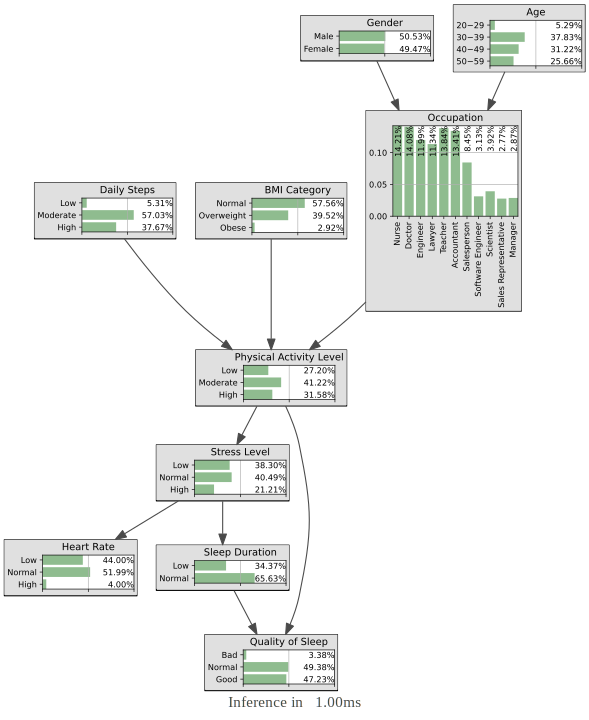

In [68]:
import pyAgrum.skbn as skbn

learner=gum.BNLearner(df, bn)
learner.useMIIC()
learner.useScoreBIC() 
learner.useSmoothingPrior(1)
bn33=learner.learnParameters(bn.dag())
gnb.showInference(bn33,size="10!")

# BN STRUCTURE BASED ON BNLearner

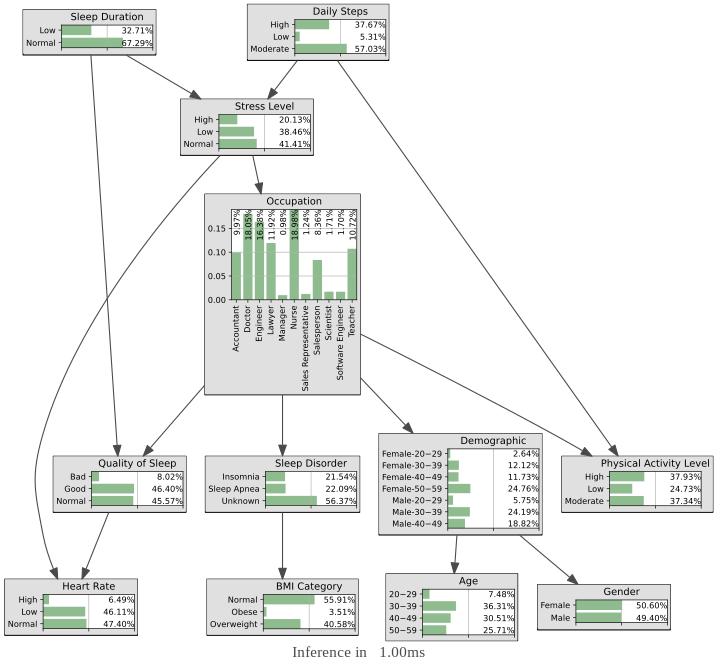

In [87]:
import pyAgrum.skbn as skbn

data = pd.read_csv('preproces.csv', index_col=0)

discretizer = skbn.BNDiscretizer(defaultDiscretizationMethod='quantile',
                                 defaultNumberOfBins=15,
                                 discretizationThreshold=30)

template = discretizer.discretizedBN(data)

learner=gum.BNLearner("preproces.csv", template)
# learner.useMIIC()
learner.useScoreBIC() 
learner.useSmoothingPrior(1)
bn33 = learner.learnBN()

gnb.showInference(bn33,size="10!")

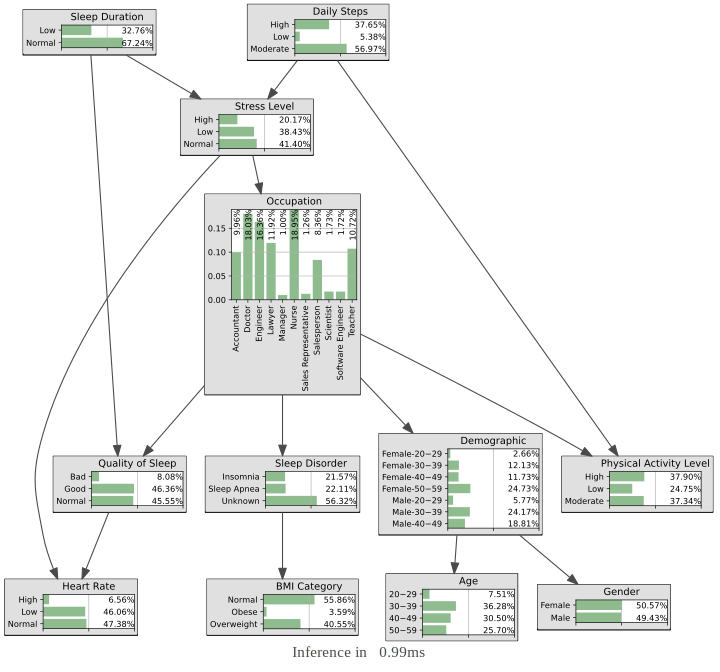

In [88]:
import pyAgrum.skbn as skbn

data = pd.read_csv('preproces.csv', index_col=0)

discretizer = skbn.BNDiscretizer(defaultDiscretizationMethod='quantile',
                                 defaultNumberOfBins=15,
                                 discretizationThreshold=30)

template = discretizer.discretizedBN(data)

learner=gum.BNLearner("preproces.csv", template)
learner.useMIIC()
# learner.useScoreBIC() 
learner.useSmoothingPrior(1)
bn33 = learner.learnBN()

gnb.showInference(bn33,size="10!")

c:\Users\Olha Shaposhnyk\anaconda3\envs\encm509lab8\Lib\site-packages\sklearn\preprocessing\_discretization.py:322: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


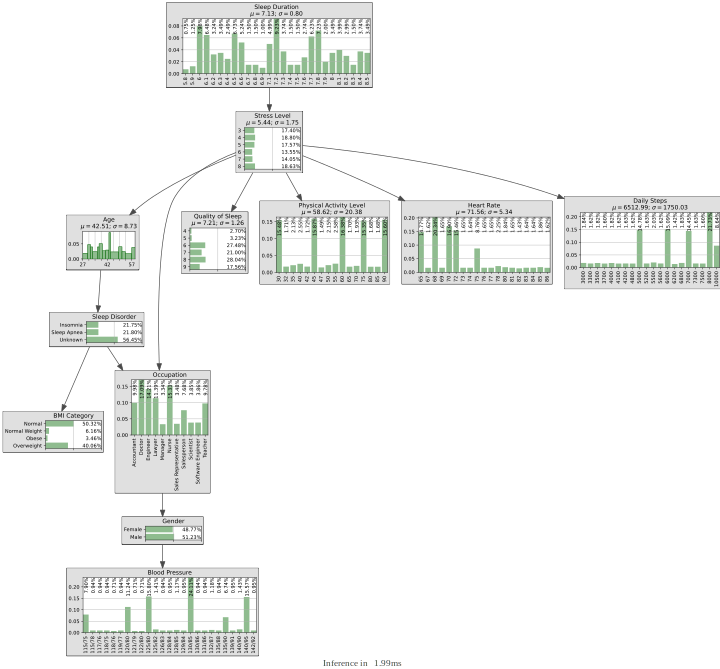

In [84]:
import pyAgrum.skbn as skbn

data = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', index_col=0)
data.fillna('Unknown', inplace=True)

discretizer = skbn.BNDiscretizer(defaultDiscretizationMethod='quantile',
                                 defaultNumberOfBins=15,
                                 discretizationThreshold=30)

template = discretizer.discretizedBN(data)

learner=gum.BNLearner(data, template)
learner.useMIIC()
learner.useScoreBIC() 
learner.useSmoothingPrior(1)
bn33=learner.learnBN()
gnb.showInference(bn33,size="10")

# LiNGAM python

In [71]:
data.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,,
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Unknown
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Unknown
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,Unknown
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [72]:
from sklearn.preprocessing import LabelEncoder
# Load your data
data_encoded = pd.read_csv("preproces_numbers.csv", index_col=0)

data_encoded.head()


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
Person ID,,,,,,,,,,,
1,1,0,9,0,1,1,1,1,1,0,2
2,1,0,1,0,1,1,2,0,1,2,2
3,1,0,1,0,1,1,2,0,1,2,2
4,1,0,6,0,0,0,2,2,2,0,1
5,1,0,6,0,0,0,2,2,2,0,1


In [73]:
import pandas as pd
from lingam import DirectLiNGAM
from lingam.utils import make_dot


# Apply LiNGAM
model = DirectLiNGAM()
model.fit(data_encoded)

# Get the adjacency matrix of the learned causal graph
adjacency_matrix = model.adjacency_matrix_

# Print the adjacency matrix
print(adjacency_matrix)



[[ 0.         -0.26794356  0.          0.          0.31338299 -0.10797069
   0.          0.          0.48989382  0.2459841  -0.08545739]
 [ 0.          0.          0.          0.          0.74278793  0.
   0.          0.93187631 -0.24617325  0.30439149 -0.17409398]
 [ 0.          0.          0.          0.         -1.41018322  0.
   0.          2.46047724 -1.91966277  0.         -0.89608089]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.75526932  0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.32695811  0.          0.
   0.          0.          0.          0.          0.        ]
 [ 0.10176752  0.          0.         -0.64701123 -0.1981164  -0.18547096
   0.          0.13342276  0.4915198   0.58095262  0.15192817]
 [ 0.          0.          0.         -0.1334741  -0.21598319  0.35123702
   0.  

In [74]:
# labels

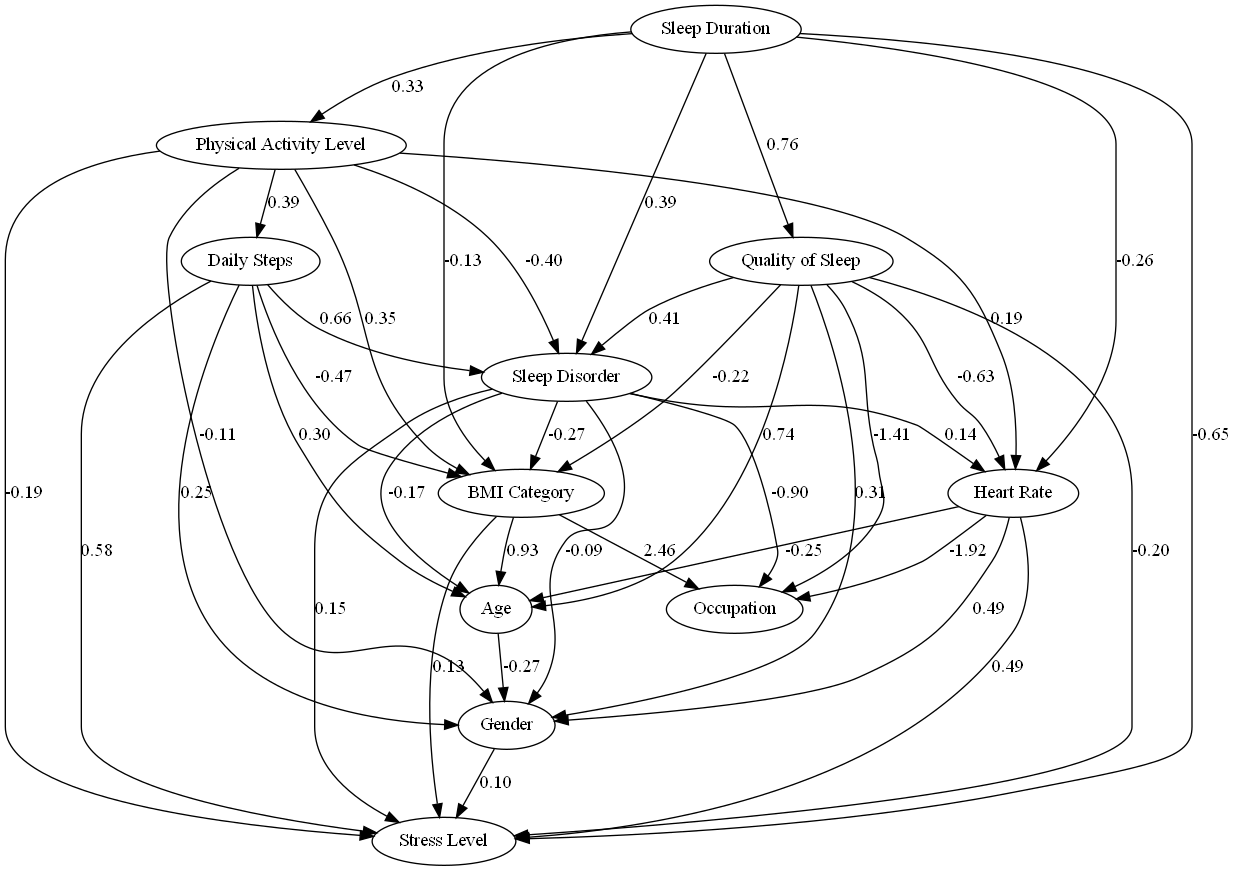

In [75]:
# Get the adjacency matrix of the learned causal graph
adjacency_matrix = model.adjacency_matrix_

# Convert labels to list
labels = data_encoded.columns.tolist()

# Visualize the graph with real labels
dot = make_dot(adjacency_matrix, labels=labels)
dot.format = 'png'
dot.render('causal_graph')

# Display the graph
from IPython.display import Image
Image(filename='causal_graph.png')

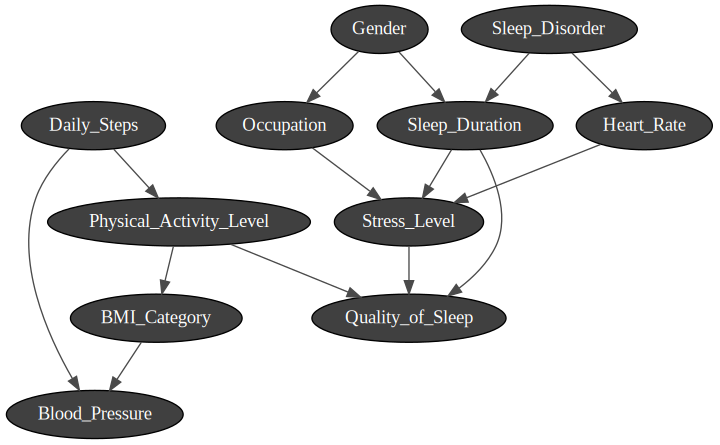

In [92]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Create a Bayesian Network
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Define the Bayesian Network structure using fastBN
bn = gum.fastBN('Daily_Steps -> Physical_Activity_Level; '
                'Gender -> Occupation; '
                'Stress_Level -> Quality_of_Sleep; '
                'Physical_Activity_Level -> BMI_Category; '
                'Sleep_Duration -> Quality_of_Sleep; '
                'Sleep_Duration -> Stress_Level; '
                'Daily_Steps -> Blood_Pressure; '
                'Sleep_Disorder -> Heart_Rate; '
                'BMI_Category -> Blood_Pressure; '
                'Occupation -> Stress_Level; '
                'Sleep_Disorder -> Sleep_Duration; '
                'Gender -> Sleep_Duration; '
                'Physical_Activity_Level -> Quality_of_Sleep; '
                'Heart_Rate -> Stress_Level')

# Display the Bayesian Network
gnb.showBN(bn, size="10!")


In [93]:
# import pyAgrum as gum
# import pyAgrum.lib.notebook as gnb

# # Define a new Bayesian Network
# bn2 = gum.fastBN('Stress_Level -> Quality_of_Sleep; '
#                  'Physical_Activity_Level -> BMI_Category; '
#                  'BMI_Category -> Sleep_Disorders; '
#                  'Physical_Activity_Level -> Heart_Rate; '
#                  'Stress_Level -> Heart_Rate; '
#                  'Age -> Sleep_Duration; '
#                  'Age -> Quality_of_Sleep')

# # Display the Bayesian Network
# gnb.showBN(bn2, size="10!")


In [78]:
data_encoded = pd.read_csv("preproces_numbers.csv", index_col=0)
data_encoded.columns = data_encoded.columns.str.replace(' ', '_')

data_encoded.head()

,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder
Person ID,,,,,,,,,,,
1,1,0,9,0,1,1,1,1,1,0,2
2,1,0,1,0,1,1,2,0,1,2,2
3,1,0,1,0,1,1,2,0,1,2,2
4,1,0,6,0,0,0,2,2,2,0,1
5,1,0,6,0,0,0,2,2,2,0,1


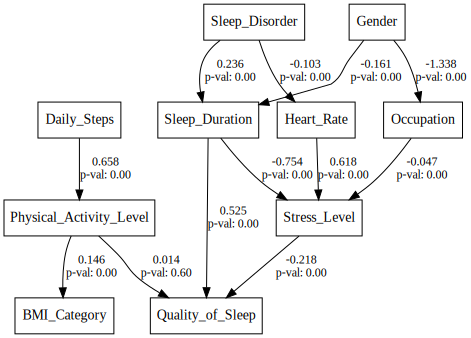

In [91]:
import semopy
import pandas as pd
import numpy as np

# Convert to semopy format
semopy_model = """
    Physical_Activity_Level ~ Daily_Steps
    Occupation ~ Gender
    Quality_of_Sleep ~ Stress_Level + Physical_Activity_Level + Sleep_Duration
    BMI_Category ~ Physical_Activity_Level
    Stress_Level ~ Sleep_Duration + Occupation + Heart_Rate
    Heart_Rate ~ Sleep_Disorder
    Sleep_Duration ~ Sleep_Disorder + Gender
"""


# Fit SEM model
mod = semopy.Model(semopy_model)
res = mod.fit(data_encoded)

# Get estimates
estimates = mod.inspect()
estimates.to_csv('estimates_gpt.csv')
semopy.semplot(mod, 'LLM_gpt.png', plot_covs=False, plot_exos=True)


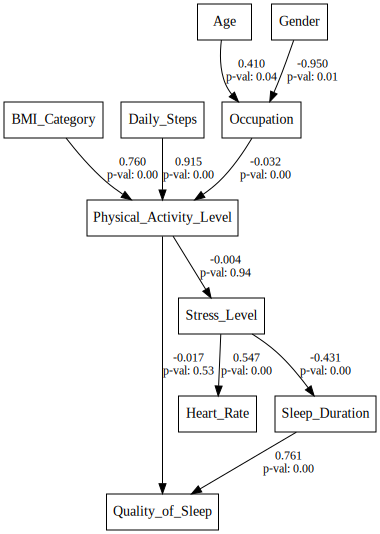

In [90]:
import semopy
import pandas as pd
import numpy as np

# Define the SEM model based on the Bayesian Network structure
semopy_model = """
    Physical_Activity_Level ~ Daily_Steps + BMI_Category + Occupation
    Occupation ~ Gender + Age
    Stress_Level ~ Physical_Activity_Level
    Heart_Rate ~ Stress_Level
    Sleep_Duration ~ Stress_Level
    Quality_of_Sleep ~ Sleep_Duration + Physical_Activity_Level
"""


# Fit SEM model
mod = semopy.Model(semopy_model)
res = mod.fit(data_encoded)

# Get estimates
estimates = mod.inspect()
estimates.to_csv('estimates_origin.csv')
semopy.semplot(mod, 'origin.png', plot_covs=False, plot_exos=True)

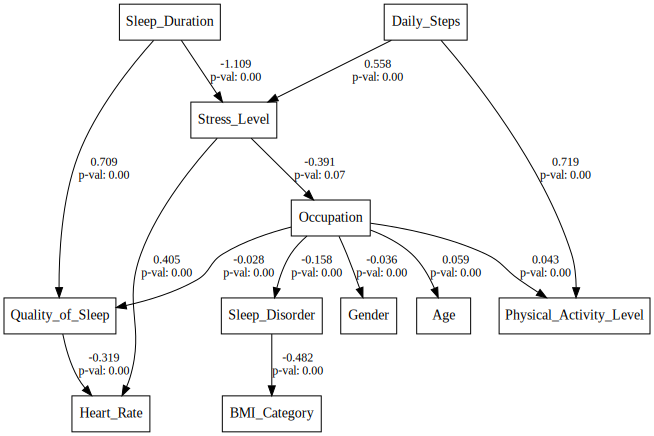

In [89]:
import semopy
import pandas as pd
import numpy as np

# Define the SEM model based on the Bayesian Network structure
semopy_model = """
    Stress_Level ~ Daily_Steps + Sleep_Duration
    Occupation ~  Stress_Level
    Quality_of_Sleep ~ Occupation + Sleep_Duration
    Sleep_Disorder ~ Occupation
    BMI_Category ~ Sleep_Disorder
    Heart_Rate ~ Stress_Level + Quality_of_Sleep
    Age ~ Occupation
    Gender ~ Occupation
    Physical_Activity_Level ~ Daily_Steps + Occupation
 
"""


# Fit SEM model
mod = semopy.Model(semopy_model)
res = mod.fit(data_encoded)

# Get estimates
estimates = mod.inspect()
estimates.to_csv('estimates_ScoreBIC.csv')
semopy.semplot(mod, 'ScoreBIC.png', plot_covs=False, plot_exos=True)

